In [1]:
# python script to calculate a PCA of the Presence / Absence matrix of the genes in the genome of the strains

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# read tsv from the file tables/gene_pa_matrix.Rtab
PA_data = pd.read_csv("../tables/gene_pa_matrix.Rtab", sep="\t", index_col=0)

In [3]:
# PCA of the tranposed matrix
pca = PCA(n_components=2)
pca.fit(PA_data.T)
pca_data = pca.transform(PA_data.T)

Text(0.5, 1.0, 'PCA of the Presence / Absence matrix of the genes in the genome of the strains')

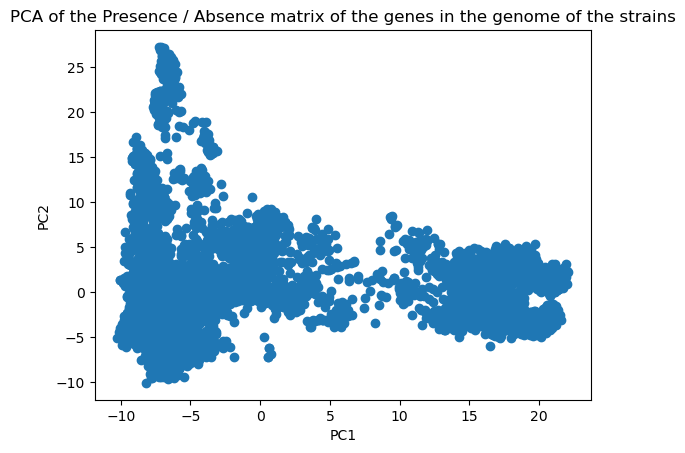

In [4]:
PA_data.T.index

# plot the PCA
plt.figure()
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the Presence / Absence matrix of the genes in the genome of the strains')

In [5]:
# save the PCA data
PCA_data = pd.DataFrame(pca_data, index=PA_data.T.index, columns=['PC1', 'PC2'])
PCA_data.to_csv("../tables/PCA_gene_pa_matrix.tsv", sep="\t")

In [6]:
# variability explained by the PCs
print(pca.explained_variance_ratio_)

[0.10870337 0.04862103]
